In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%pip install keras
#%pip install tensorflow

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [2]:
mnist.load_data

<function keras.datasets.mnist.load_data(path='mnist.npz')>

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap ='binary')
    plt.title(y_train[i])
    plt.show()

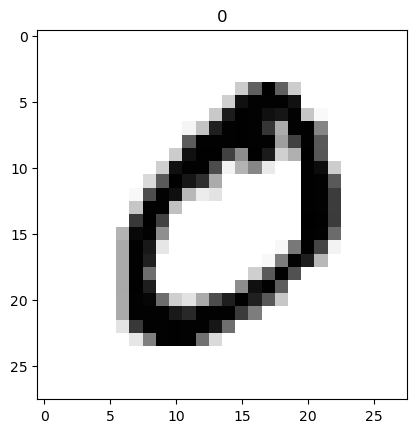

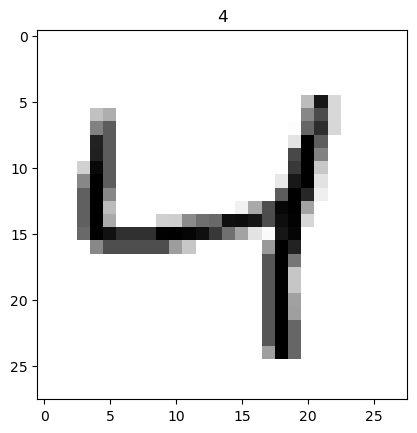

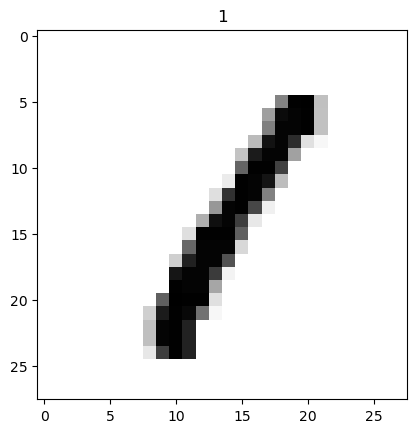

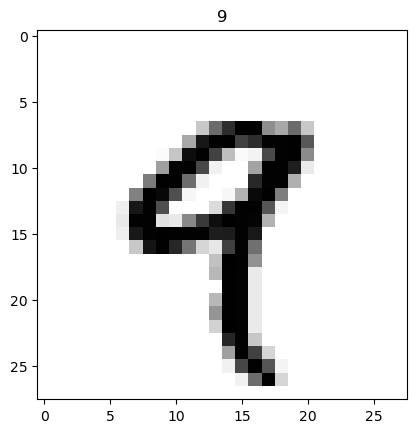

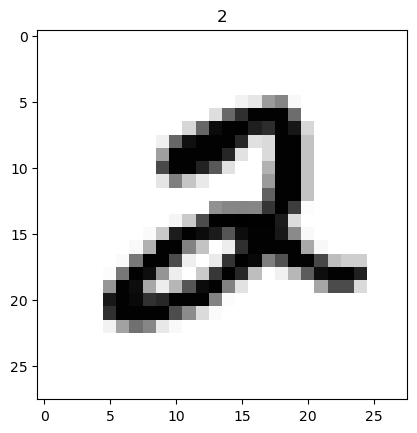

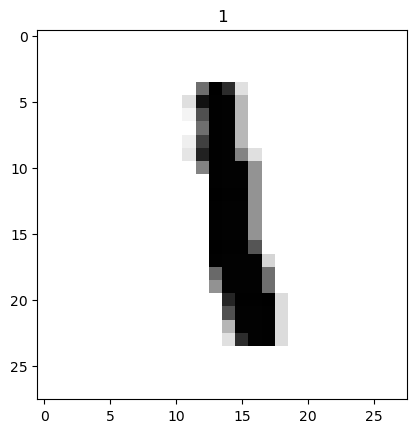

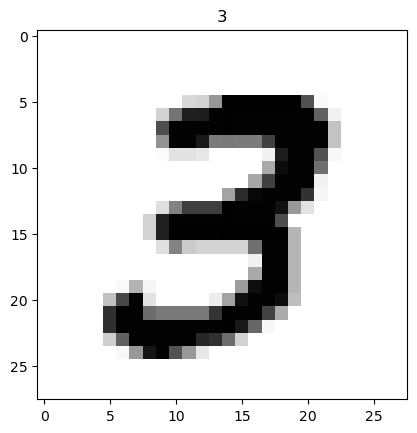

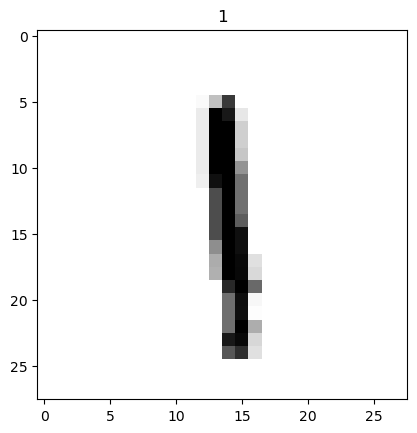

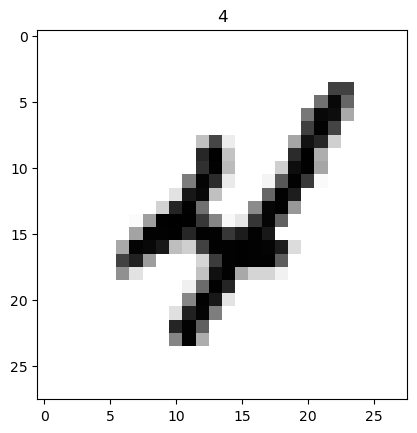

In [5]:
for i in range(1, 10):
    plot_input_img(i)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
# RGB (Red, Green, Blue) are 8 bit each. The range for each individual colour is 0-255 (as 2^8 = 256 possibilities).
# Each pixel have range from 0-256.
# So, dividing by 255 scales the pixel value in [0,1].

In [8]:
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [11]:
# Make the data 3-dimensional
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [12]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [13]:
y_train, y_test

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [14]:
# One-Hot Encoding of y_train
y_train = keras.utils.to_categorical(y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
# One-Hot Encoding of y_test
y_test = keras.utils.to_categorical(y_test)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation = "softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
____________________________________________________

In [18]:
model.compile(optimizer = 'Adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.3)

Epoch 1/50
1313/1313 [==============================] - 29s 21ms/step - loss: 0.2824 - accuracy: 0.9203 - val_loss: 0.1308 - val_accuracy: 0.9618
Epoch 2/50
1313/1313 [==============================] - 26s 20ms/step - loss: 0.1101 - accuracy: 0.9675 - val_loss: 0.0912 - val_accuracy: 0.9727
Epoch 3/50
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0842 - accuracy: 0.9755 - val_loss: 0.0812 - val_accuracy: 0.9749
Epoch 4/50
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0716 - accuracy: 0.9781 - val_loss: 0.0733 - val_accuracy: 0.9784
Epoch 5/50
1313/1313 [==============================] - 26s 19ms/step - loss: 0.0620 - accuracy: 0.9812 - val_loss: 0.0700 - val_accuracy: 0.9785
Epoch 6/50
1313/1313 [==============================] - 27s 21ms/step - loss: 0.0543 - accuracy: 0.9833 - val_loss: 0.0672 - val_accuracy: 0.9799
Epoch 7/50
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0500 - accuracy: 0.9842 - val_loss: 0.0701 -

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0811 - accuracy: 0.9853


[0.08113303035497665, 0.9853000044822693]

In [21]:
model.predict(X_test)

313/313 [==============================] - 3s 7ms/step


array([[2.14416067e-16, 5.22614829e-16, 1.97330708e-14, ...,
        1.00000000e+00, 1.77272762e-11, 1.51208213e-09],
       [1.41279305e-17, 5.20042010e-14, 1.00000000e+00, ...,
        1.03415757e-25, 1.05725185e-20, 4.49132819e-21],
       [6.18906371e-10, 9.99996781e-01, 5.52163399e-08, ...,
        1.25697275e-09, 3.63908121e-08, 9.07745146e-12],
       ...,
       [3.23858285e-24, 7.54331850e-19, 9.73065546e-20, ...,
        1.35008268e-10, 2.13427158e-11, 3.15242832e-10],
       [2.73161275e-19, 1.98460768e-22, 4.07948928e-22, ...,
        3.97442047e-15, 7.43646755e-10, 1.57029321e-17],
       [2.07153322e-18, 2.21339921e-29, 1.57278958e-14, ...,
        1.00574095e-25, 4.59890080e-16, 1.03467269e-21]], dtype=float32)

In [22]:
X_test_pred = model.predict(X_test) 
classes_X_test_pred = np.argmax(X_test_pred,axis=1)
classes_X_test_pred

313/313 [==============================] - 2s 7ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

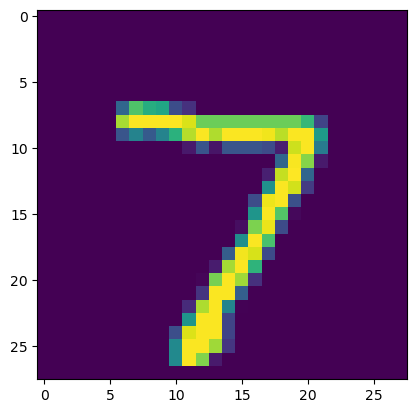

In [23]:
plt.imshow(X_test[0])

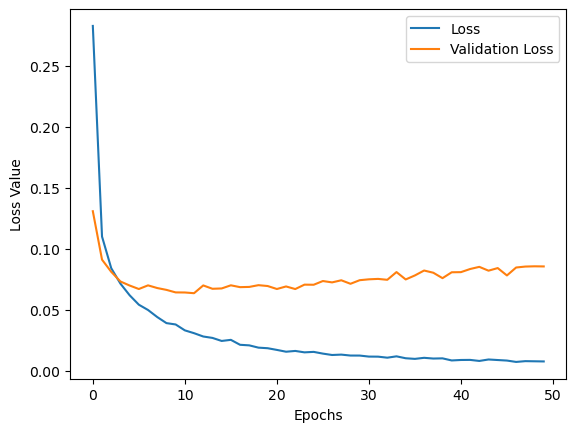

In [24]:
plt.plot(history.history['loss'], label = "Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend()

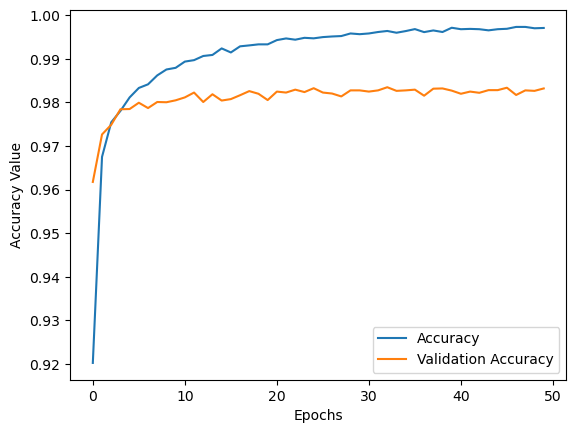

In [25]:
plt.plot(history.history['accuracy'], label = "Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Value")
plt.legend()

In [26]:
# This model can be implemented using PyGame.